In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

*Load necessary libraries*

In [2]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
data_x /= np.max(data_x)


*Generate our data*

In [3]:
data_x = np.hstack((np.ones_like(data_x), data_x))


*Add intercept data and normalize*

In [4]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]

*Shuffle data and produce train and test sets*

In [5]:
def get_gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    mse = (1.0/len(x))*np.sum(np.power(error, 2))
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, mse

*Create gradient function*

In [6]:
w = np.random.randn(2)
alpha = 0.5
tolerance = 1e-5

# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged.")
        break
    
    # Print error every 50 iterations
    if iterations % 100 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
    
    iterations += 1
    w = new_w

print ("w =",w)
print("Test Cost =", get_gradient(w, test_x, test_y)[1])

Iteration: 100 - Error: 1.5431
Iteration: 200 - Error: 1.5133
Iteration: 300 - Error: 1.5132
Converged.
('w =', array([ -2.11836996,  11.21991985]))
('Test Cost =', 1.1901140935260848)


*Perform gradient descent to learn model*

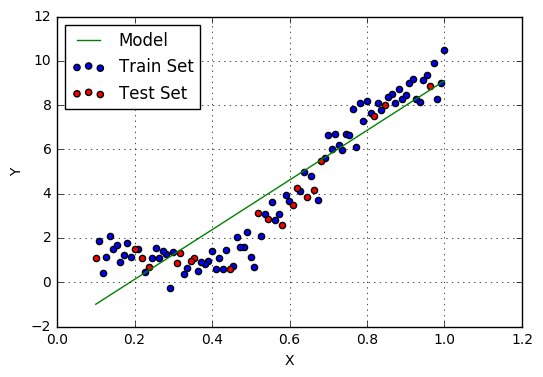

In [7]:
plt.plot(data_x[:,1], data_x.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

*Plot the model obtained*

*Generate contour plot of the cost function*

In [8]:
regr = lm.LinearRegression(fit_intercept=False)

In [9]:
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [10]:
regr.coef_

array([[ -2.11850676,  11.22015002]])

In [11]:
regr.score(test_x, test_y)

0.81016105914060133